In [1]:
from keras.layers import Input, Lambda, Dense, Flatten
from keras.models import Model
from keras.applications.vgg19 import VGG19
from keras.applications.vgg19 import preprocess_input
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
import numpy as np
from glob import glob
import matplotlib.pyplot as plt
import tensorflow as tf

In [2]:
IMAGE_SIZE = [224, 224]

test_path = r'/kaggle/input/pre-processed-hair-data/hair-diseases/Hair Diseases - Final/test'
val_path = r'/kaggle/input/pre-processed-hair-data/hair-diseases/Hair Diseases - Final/val'


In [3]:
from keras.preprocessing.image import ImageDataGenerator

# Create ImageDataGenerator for test data
test_datagen = ImageDataGenerator(rescale=1./255)

# Load test data from directory
test_set = test_datagen.flow_from_directory(
    directory=test_path,
    target_size=(224, 224),
    batch_size=64,
    class_mode='categorical', 
    shuffle=False
)

val_datagen = ImageDataGenerator(rescale=1./255)

# Load test data from directory
val_set = val_datagen.flow_from_directory(
    directory=val_path,
    target_size=(224, 224),
    batch_size=64,
    class_mode='categorical', 
    shuffle=False
)

Found 1200 images belonging to 10 classes.
Found 1200 images belonging to 10 classes.


# Load the saved models


In [4]:
model1 = tf.keras.models.load_model('/kaggle/input/hair-diseases-preprocessed-mobilenetv2model/MobileNetV2-Final.h5')
model2 = tf.keras.models.load_model('/kaggle/input/hair-diseases-preprocessed-vgg19model/VGG19-Final.h5')
model3 = tf.keras.models.load_model('/kaggle/input/hair-diseases-preprocessed-vgg16model/VGG16-Final.h5')
model4 = tf.keras.models.load_model('/kaggle/input/hair-diseases-preprocessed-cnnmodel/raw_cnn_model.h5')

# Testdata set

In [5]:
predictions = []
for model in [model1, model2, model3, model4]:
    predictions.append(model.predict(test_set))

ensemble_predictions = np.mean(predictions, axis=0)

final_predictions = np.argmax(ensemble_predictions, axis=1)



In [6]:
final_predictions

array([0, 0, 0, ..., 9, 9, 9])

In [7]:
from sklearn.metrics import classification_report
test_labels = test_set.classes

report = classification_report(test_labels, final_predictions)
print(report)


              precision    recall  f1-score   support

           0       1.00      1.00      1.00       120
           1       0.99      0.97      0.98       120
           2       1.00      1.00      1.00       120
           3       0.98      0.99      0.99       120
           4       0.99      0.98      0.99       120
           5       1.00      1.00      1.00       120
           6       1.00      1.00      1.00       120
           7       0.97      0.98      0.98       120
           8       1.00      1.00      1.00       120
           9       0.98      0.98      0.98       120

    accuracy                           0.99      1200
   macro avg       0.99      0.99      0.99      1200
weighted avg       0.99      0.99      0.99      1200



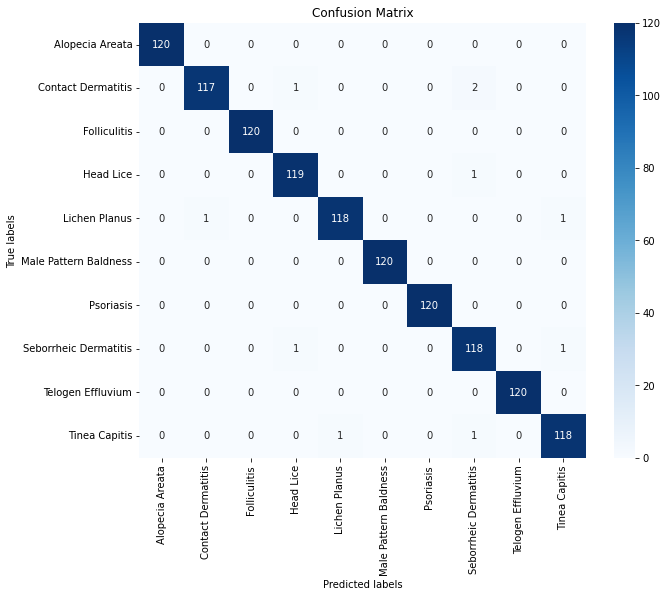

In [8]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

conf_matrix = confusion_matrix(test_labels, final_predictions)

plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', 
            xticklabels=test_set.class_indices.keys(), 
            yticklabels=test_set.class_indices.keys())
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()


# val dataset

In [9]:
predictions = []
for model in [model1, model2, model3, model4]:
    predictions.append(model.predict(val_set))

ensemble_predictions = np.mean(predictions, axis=0)

final_predictions = np.argmax(ensemble_predictions, axis=1)



In [10]:
final_predictions

array([0, 0, 0, ..., 9, 9, 9])

In [11]:
from sklearn.metrics import classification_report
test_labels = test_set.classes

report = classification_report(test_labels, final_predictions)
print(report)


              precision    recall  f1-score   support

           0       1.00      1.00      1.00       120
           1       0.99      0.99      0.99       120
           2       1.00      1.00      1.00       120
           3       1.00      0.99      1.00       120
           4       1.00      0.98      0.99       120
           5       1.00      1.00      1.00       120
           6       1.00      0.99      1.00       120
           7       0.98      0.99      0.98       120
           8       1.00      1.00      1.00       120
           9       0.98      1.00      0.99       120

    accuracy                           0.99      1200
   macro avg       1.00      0.99      1.00      1200
weighted avg       1.00      0.99      1.00      1200



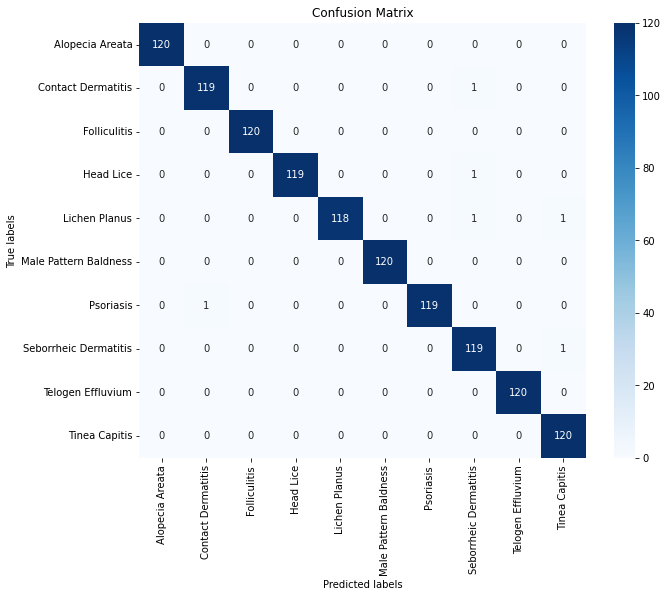

In [12]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

conf_matrix = confusion_matrix(test_labels, final_predictions)

plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', 
            xticklabels=test_set.class_indices.keys(), 
            yticklabels=test_set.class_indices.keys())
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()
